In [1]:
# Experimento 1: 5 classes utilizando xgboost

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('landmarks_named_cleaned.csv')
df.head()

,row_id,video_name,video_id,class,frame_id,pose_x_0,pose_y_0,pose_z_0,pose_x_1,pose_y_1,pose_z_1,pose_x_2,pose_y_2,pose_z_2,pose_x_3,pose_y_3,pose_z_3,pose_x_4,pose_y_4,pose_z_4,pose_x_5,pose_y_5,pose_z_5,pose_x_6,pose_y_6,pose_z_6,pose_x_7,pose_y_7,pose_z_7,pose_x_8,pose_y_8,pose_z_8,pose_x_9,pose_y_9,pose_z_9,pose_x_10,pose_y_10,pose_z_10,pose_x_11,pose_y_11,pose_z_11,pose_x_12,pose_y_12,pose_z_12,pose_x_13,pose_y_13,pose_z_13,pose_x_14,pose_y_14,pose_z_14,pose_x_15,pose_y_15,pose_z_15,pose_x_16,pose_y_16,pose_z_16,pose_x_17,pose_y_17,pose_z_17,pose_x_18,pose_y_18,pose_z_18,pose_x_19,pose_y_19,pose_z_19,pose_x_20,pose_y_20,pose_z_20,pose_x_21,pose_y_21,pose_z_21,pose_x_22,pose_y_22,pose_z_22,pose_x_23,pose_y_23,pose_z_23,pose_x_24,pose_y_24,pose_z_24,pose_x_25,pose_y_25,pose_z_25,pose_x_26,pose_y_26,pose_z_26,pose_x_27,pose_y_27,pose_z_27,pose_x_28,pose_y_28,pose_z_28,pose_x_29,pose_y_29,pose_z_29,pose_x_30,pose_y_30,pose_z_30,pose_x_31,pose_y_31,pose_z_31,pose_x_32,pose_y_32,pose_z_32,left_hand_x_0,left_hand_y_0,left_hand_z_0,left_hand_x_1,left_hand_y_1,left_hand_z_1,left_hand_x_2,left_hand_y_2,left_hand_z_2,left_hand_x_3,left_hand_y_3,left_hand_z_3,left_hand_x_4,left_hand_y_4,left_hand_z_4,left_hand_x_5,left_hand_y_5,left_hand_z_5,left_hand_x_6,left_hand_y_6,left_hand_z_6,left_hand_x_7,left_hand_y_7,left_hand_z_7,left_hand_x_8,left_hand_y_8,left_hand_z_8,left_hand_x_9,left_hand_y_9,left_hand_z_9,left_hand_x_10,left_hand_y_10,left_hand_z_10,left_hand_x_11,left_hand_y_11,left_hand_z_11,left_hand_x_12,left_hand_y_12,left_hand_z_12,left_hand_x_13,left_hand_y_13,left_hand_z_13,left_hand_x_14,left_hand_y_14,left_hand_z_14,left_hand_x_15,left_hand_y_15,left_hand_z_15,left_hand_x_16,left_hand_y_16,left_hand_z_16,left_hand_x_17,left_hand_y_17,left_hand_z_17,left_hand_x_18,left_hand_y_18,left_hand_z_18,left_hand_x_19,left_hand_y_19,left_hand_z_19,left_hand_x_20,left_hand_y_20,left_hand_z_20,right_hand_x_0,right_hand_y_0,right_hand_z_0,right_hand_x_1,right_hand_y_1,right_hand_z_1,right_hand_x_2,right_hand_y_2,right_hand_z_2,right_hand_x_3,right_hand_y_3,right_hand_z_3,right_hand_x_4,right_hand_y_4,right_hand_z_4,right_hand_x_5,right_hand_y_5,right_hand_z_5,right_hand_x_6,right_hand_y_6,right_hand_z_6,right_hand_x_7,right_hand_y_7,right_hand_z_7,right_hand_x_8,right_hand_y_8,right_hand_z_8,right_hand_x_9,right_hand_y_9,right_hand_z_9,right_hand_x_10,right_hand_y_10,right_hand_z_10,right_hand_x_11,right_hand_y_11,right_hand_z_11,right_hand_x_12,right_hand_y_12,right_hand_z_12,right_hand_x_13,right_hand_y_13,right_hand_z_13,right_hand_x_14,right_hand_y_14,right_hand_z_14,right_hand_x_15,right_hand_y_15,right_hand_z_15,right_hand_x_16,right_hand_y_16,right_hand_z_16,right_hand_x_17,right_hand_y_17,right_hand_z_17,right_hand_x_18,right_hand_y_18,right_hand_z_18,right_hand_x_19,right_hand_y_19,right_hand_z_19,right_hand_x_20,right_hand_y_20,right_hand_z_20
0,0-abacaxi-0,INES_abacaxi.mp4,0,abacaxi,0,0.495696,0.251119,-1.002079,0.521189,0.209761,-0.950463,0.533843,0.210290,-0.950714,0.545261,0.212878,-0.950727,0.475877,0.212704,-0.947200,0.463136,0.214114,-0.947133,0.449410,0.217801,-0.947687,0.568593,0.239211,-0.606676,0.438194,0.247255,-0.582871,0.526797,0.307200,-0.875365,0.471233,0.309380,-0.868394,0.678584,0.549230,-0.385215,0.340820,0.535919,-0.348497,0.732885,0.914818,-0.342786,0.284963,0.897970,-0.278457,0.760130,1.175227,-0.769186,0.243029,1.153512,-0.695576,0.773915,1.271270,-0.890982,0.231868,1.245445,-0.805940,0.777519,1.251563,-0.976210,0.247854,1.218896,-0.912472,0.754638,1.220732,-0.820010,0.262080,1.188589,-0.751582,0.611316,1.167632,-0.052547,0.393333,1.161095,0.055406,0.587860,1.639734,-0.011705,0.374465,1.629446,0.069825,0.578596,2.055129,0.575189,0.369760,2.055653,0.518373,0.584013,2.119297,0.603794,0.367156,2.122602,0.545353,0.547246,2.189754,0.140391,0.393758,2.191146,0.033494,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3

In [2]:
# Selecionando as 5 classes

classes = ['abacaxi', 'acompanhar', 'acordar', 'acrescentar', 'alto']
df_5_classes = df[df['class'].isin(classes)]
df_5_classes.tail()

,row_id,video_name,video_id,class,frame_id,pose_x_0,pose_y_0,pose_z_0,pose_x_1,pose_y_1,pose_z_1,pose_x_2,pose_y_2,pose_z_2,pose_x_3,pose_y_3,pose_z_3,pose_x_4,pose_y_4,pose_z_4,pose_x_5,pose_y_5,pose_z_5,pose_x_6,pose_y_6,pose_z_6,pose_x_7,pose_y_7,pose_z_7,pose_x_8,pose_y_8,pose_z_8,pose_x_9,pose_y_9,pose_z_9,pose_x_10,pose_y_10,pose_z_10,pose_x_11,pose_y_11,pose_z_11,pose_x_12,pose_y_12,pose_z_12,pose_x_13,pose_y_13,pose_z_13,pose_x_14,pose_y_14,pose_z_14,pose_x_15,pose_y_15,pose_z_15,pose_x_16,pose_y_16,pose_z_16,pose_x_17,pose_y_17,pose_z_17,pose_x_18,pose_y_18,pose_z_18,pose_x_19,pose_y_19,pose_z_19,pose_x_20,pose_y_20,pose_z_20,pose_x_21,pose_y_21,pose_z_21,pose_x_22,pose_y_22,pose_z_22,pose_x_23,pose_y_23,pose_z_23,pose_x_24,pose_y_24,pose_z_24,pose_x_25,pose_y_25,pose_z_25,pose_x_26,pose_y_26,pose_z_26,pose_x_27,pose_y_27,pose_z_27,pose_x_28,pose_y_28,pose_z_28,pose_x_29,pose_y_29,pose_z_29,pose_x_30,pose_y_30,pose_z_30,pose_x_31,pose_y_31,pose_z_31,pose_x_32,pose_y_32,pose_z_32,left_hand_x_0,left_hand_y_0,left_hand_z_0,left_hand_x_1,left_hand_y_1,left_hand_z_1,left_hand_x_2,left_hand_y_2,left_hand_z_2,left_hand_x_3,left_hand_y_3,left_hand_z_3,left_hand_x_4,left_hand_y_4,left_hand_z_4,left_hand_x_5,left_hand_y_5,left_hand_z_5,left_hand_x_6,left_hand_y_6,left_hand_z_6,left_hand_x_7,left_hand_y_7,left_hand_z_7,left_hand_x_8,left_hand_y_8,left_hand_z_8,left_hand_x_9,left_hand_y_9,left_hand_z_9,left_hand_x_10,left_hand_y_10,left_hand_z_10,left_hand_x_11,left_hand_y_11,left_hand_z_11,left_hand_x_12,left_hand_y_12,left_hand_z_12,left_hand_x_13,left_hand_y_13,left_hand_z_13,left_hand_x_14,left_hand_y_14,left_hand_z_14,left_hand_x_15,left_hand_y_15,left_hand_z_15,left_hand_x_16,left_hand_y_16,left_hand_z_16,left_hand_x_17,left_hand_y_17,left_hand_z_17,left_hand_x_18,left_hand_y_18,left_hand_z_18,left_hand_x_19,left_hand_y_19,left_hand_z_19,left_hand_x_20,left_hand_y_20,left_hand_z_20,right_hand_x_0,right_hand_y_0,right_hand_z_0,right_hand_x_1,right_hand_y_1,right_hand_z_1,right_hand_x_2,right_hand_y_2,right_hand_z_2,right_hand_x_3,right_hand_y_3,right_hand_z_3,right_hand_x_4,right_hand_y_4,right_hand_z_4,right_hand_x_5,right_hand_y_5,right_hand_z_5,right_hand_x_6,right_hand_y_6,right_hand_z_6,right_hand_x_7,right_hand_y_7,right_hand_z_7,right_hand_x_8,right_hand_y_8,right_hand_z_8,right_hand_x_9,right_hand_y_9,right_hand_z_9,right_hand_x_10,right_hand_y_10,right_hand_z_10,right_hand_x_11,right_hand_y_11,right_hand_z_11,right_hand_x_12,right_hand_y_12,right_hand_z_12,right_hand_x_13,right_hand_y_13,right_hand_z_13,right_hand_x_14,right_hand_y_14,right_hand_z_14,right_hand_x_15,right_hand_y_15,right_hand_z_15,right_hand_x_16,right_hand_y_16,right_hand_z_16,right_hand_x_17,right_hand_y_17,right_hand_z_17,right_hand_x_18,right_hand_y_18,right_hand_z_18,right_hand_x_19,right_hand_y_19,right_hand_z_19,right_hand_x_20,right_hand_y_20,right_hand_z_20
5887,41-alto-128,UFV_alto.mp4,41,alto,128,0.499661,0.238718,-0.374171,0.508940,0.212511,-0.345987,0.515454,0.213191,-0.346067,0.521179,0.213792,-0.346055,0.489221,0.213203,-0.351160,0.482351,0.215410,-0.351172,0.475775,0.217255,-0.351381,0.526979,0.229442,-0.168345,0.467926,0.233166,-0.190576,0.512129,0.271519,-0.307469,0.486343,0.270697,-0.313453,0.576338,0.408993,-0.069632,0.416121,0.404420,-0.124490,0.593353,0.631844,-0.097048,0.392008,0.624176,-0.174291,0.524525,0.768704,-0.319736,0.453151,0.773096,-0.363825,0.503605,0.822567,-0.392957,0.469854,0.828796,-0.422465,0.490543,0.792517,-0.416165,0.478752,0.806323,-0.448521,0.493394,0.776571,-0.332835,0.475402,0.789734,-0.375637,0.540385,0.842359,0.011632,0.448171,0.836159,-0.010739,0.539912,1.165050,-0.035475,0.448270,1.116672,-0.054473,0.541461,1.451696,0.210991,0.456534,1.447328,0.098866,0.540949,1.490837,0.224524,0.456091,1.485940,0.105434,0.537893,1.540042,0.037106,0.466934,1.537966,-0.110594,0.518188,0.764132,1.141826e-07,0.499365,0.756500,-0.000372,0.484004,0.759917,-0.002409,0.470380,0.771245,-0.004139,0.459389,0.779450,-0.005878,0

In [3]:
# tranformando as classes em números

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_treino = df_5_classes.copy()
df_treino['class_num'] = le.fit_transform(df_treino['class'])
df_treino.head()

,row_id,video_name,video_id,class,frame_id,pose_x_0,pose_y_0,pose_z_0,pose_x_1,pose_y_1,pose_z_1,pose_x_2,pose_y_2,pose_z_2,pose_x_3,pose_y_3,pose_z_3,pose_x_4,pose_y_4,pose_z_4,pose_x_5,pose_y_5,pose_z_5,pose_x_6,pose_y_6,pose_z_6,pose_x_7,pose_y_7,pose_z_7,pose_x_8,pose_y_8,pose_z_8,pose_x_9,pose_y_9,pose_z_9,pose_x_10,pose_y_10,pose_z_10,pose_x_11,pose_y_11,pose_z_11,pose_x_12,pose_y_12,pose_z_12,pose_x_13,pose_y_13,pose_z_13,pose_x_14,pose_y_14,pose_z_14,pose_x_15,pose_y_15,pose_z_15,pose_x_16,pose_y_16,pose_z_16,pose_x_17,pose_y_17,pose_z_17,pose_x_18,pose_y_18,pose_z_18,pose_x_19,pose_y_19,pose_z_19,pose_x_20,pose_y_20,pose_z_20,pose_x_21,pose_y_21,pose_z_21,pose_x_22,pose_y_22,pose_z_22,pose_x_23,pose_y_23,pose_z_23,pose_x_24,pose_y_24,pose_z_24,pose_x_25,pose_y_25,pose_z_25,pose_x_26,pose_y_26,pose_z_26,pose_x_27,pose_y_27,pose_z_27,pose_x_28,pose_y_28,pose_z_28,pose_x_29,pose_y_29,pose_z_29,pose_x_30,pose_y_30,pose_z_30,pose_x_31,pose_y_31,pose_z_31,pose_x_32,pose_y_32,pose_z_32,left_hand_x_0,left_hand_y_0,left_hand_z_0,left_hand_x_1,left_hand_y_1,left_hand_z_1,left_hand_x_2,left_hand_y_2,left_hand_z_2,left_hand_x_3,left_hand_y_3,left_hand_z_3,left_hand_x_4,left_hand_y_4,left_hand_z_4,left_hand_x_5,left_hand_y_5,left_hand_z_5,left_hand_x_6,left_hand_y_6,left_hand_z_6,left_hand_x_7,left_hand_y_7,left_hand_z_7,left_hand_x_8,left_hand_y_8,left_hand_z_8,left_hand_x_9,left_hand_y_9,left_hand_z_9,left_hand_x_10,left_hand_y_10,left_hand_z_10,left_hand_x_11,left_hand_y_11,left_hand_z_11,left_hand_x_12,left_hand_y_12,left_hand_z_12,left_hand_x_13,left_hand_y_13,left_hand_z_13,left_hand_x_14,left_hand_y_14,left_hand_z_14,left_hand_x_15,left_hand_y_15,left_hand_z_15,left_hand_x_16,left_hand_y_16,left_hand_z_16,left_hand_x_17,left_hand_y_17,left_hand_z_17,left_hand_x_18,left_hand_y_18,left_hand_z_18,left_hand_x_19,left_hand_y_19,left_hand_z_19,left_hand_x_20,left_hand_y_20,left_hand_z_20,right_hand_x_0,right_hand_y_0,right_hand_z_0,right_hand_x_1,right_hand_y_1,right_hand_z_1,right_hand_x_2,right_hand_y_2,right_hand_z_2,right_hand_x_3,right_hand_y_3,right_hand_z_3,right_hand_x_4,right_hand_y_4,right_hand_z_4,right_hand_x_5,right_hand_y_5,right_hand_z_5,right_hand_x_6,right_hand_y_6,right_hand_z_6,right_hand_x_7,right_hand_y_7,right_hand_z_7,right_hand_x_8,right_hand_y_8,right_hand_z_8,right_hand_x_9,right_hand_y_9,right_hand_z_9,right_hand_x_10,right_hand_y_10,right_hand_z_10,right_hand_x_11,right_hand_y_11,right_hand_z_11,right_hand_x_12,right_hand_y_12,right_hand_z_12,right_hand_x_13,right_hand_y_13,right_hand_z_13,right_hand_x_14,right_hand_y_14,right_hand_z_14,right_hand_x_15,right_hand_y_15,right_hand_z_15,right_hand_x_16,right_hand_y_16,right_hand_z_16,right_hand_x_17,right_hand_y_17,right_hand_z_17,right_hand_x_18,right_hand_y_18,right_hand_z_18,right_hand_x_19,right_hand_y_19,right_hand_z_19,right_hand_x_20,right_hand_y_20,right_hand_z_20,class_num
0,0-abacaxi-0,INES_abacaxi.mp4,0,abacaxi,0,0.495696,0.251119,-1.002079,0.521189,0.209761,-0.950463,0.533843,0.210290,-0.950714,0.545261,0.212878,-0.950727,0.475877,0.212704,-0.947200,0.463136,0.214114,-0.947133,0.449410,0.217801,-0.947687,0.568593,0.239211,-0.606676,0.438194,0.247255,-0.582871,0.526797,0.307200,-0.875365,0.471233,0.309380,-0.868394,0.678584,0.549230,-0.385215,0.340820,0.535919,-0.348497,0.732885,0.914818,-0.342786,0.284963,0.897970,-0.278457,0.760130,1.175227,-0.769186,0.243029,1.153512,-0.695576,0.773915,1.271270,-0.890982,0.231868,1.245445,-0.805940,0.777519,1.251563,-0.976210,0.247854,1.218896,-0.912472,0.754638,1.220732,-0.820010,0.262080,1.188589,-0.751582,0.611316,1.167632,-0.052547,0.393333,1.161095,0.055406,0.587860,1.639734,-0.011705,0.374465,1.629446,0.069825,0.578596,2.055129,0.575189,0.369760,2.055653,0.518373,0.584013,2.119297,0.603794,0.367156,2.122602,0.545353,0.547246,2.189754,0.140391,0.393758,2.191146,0.033494,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0

In [4]:
# Tirando colunas desnecessárias

colunas_informativas = ['row_id', 'video_name', 'video_id', 'class', 'frame_id']
df_treino = df_treino.drop(columns=colunas_informativas)
df_treino.head()

,pose_x_0,pose_y_0,pose_z_0,pose_x_1,pose_y_1,pose_z_1,pose_x_2,pose_y_2,pose_z_2,pose_x_3,pose_y_3,pose_z_3,pose_x_4,pose_y_4,pose_z_4,pose_x_5,pose_y_5,pose_z_5,pose_x_6,pose_y_6,pose_z_6,pose_x_7,pose_y_7,pose_z_7,pose_x_8,pose_y_8,pose_z_8,pose_x_9,pose_y_9,pose_z_9,pose_x_10,pose_y_10,pose_z_10,pose_x_11,pose_y_11,pose_z_11,pose_x_12,pose_y_12,pose_z_12,pose_x_13,pose_y_13,pose_z_13,pose_x_14,pose_y_14,pose_z_14,pose_x_15,pose_y_15,pose_z_15,pose_x_16,pose_y_16,pose_z_16,pose_x_17,pose_y_17,pose_z_17,pose_x_18,pose_y_18,pose_z_18,pose_x_19,pose_y_19,pose_z_19,pose_x_20,pose_y_20,pose_z_20,pose_x_21,pose_y_21,pose_z_21,pose_x_22,pose_y_22,pose_z_22,pose_x_23,pose_y_23,pose_z_23,pose_x_24,pose_y_24,pose_z_24,pose_x_25,pose_y_25,pose_z_25,pose_x_26,pose_y_26,pose_z_26,pose_x_27,pose_y_27,pose_z_27,pose_x_28,pose_y_28,pose_z_28,pose_x_29,pose_y_29,pose_z_29,pose_x_30,pose_y_30,pose_z_30,pose_x_31,pose_y_31,pose_z_31,pose_x_32,pose_y_32,pose_z_32,left_hand_x_0,left_hand_y_0,left_hand_z_0,left_hand_x_1,left_hand_y_1,left_hand_z_1,left_hand_x_2,left_hand_y_2,left_hand_z_2,left_hand_x_3,left_hand_y_3,left_hand_z_3,left_hand_x_4,left_hand_y_4,left_hand_z_4,left_hand_x_5,left_hand_y_5,left_hand_z_5,left_hand_x_6,left_hand_y_6,left_hand_z_6,left_hand_x_7,left_hand_y_7,left_hand_z_7,left_hand_x_8,left_hand_y_8,left_hand_z_8,left_hand_x_9,left_hand_y_9,left_hand_z_9,left_hand_x_10,left_hand_y_10,left_hand_z_10,left_hand_x_11,left_hand_y_11,left_hand_z_11,left_hand_x_12,left_hand_y_12,left_hand_z_12,left_hand_x_13,left_hand_y_13,left_hand_z_13,left_hand_x_14,left_hand_y_14,left_hand_z_14,left_hand_x_15,left_hand_y_15,left_hand_z_15,left_hand_x_16,left_hand_y_16,left_hand_z_16,left_hand_x_17,left_hand_y_17,left_hand_z_17,left_hand_x_18,left_hand_y_18,left_hand_z_18,left_hand_x_19,left_hand_y_19,left_hand_z_19,left_hand_x_20,left_hand_y_20,left_hand_z_20,right_hand_x_0,right_hand_y_0,right_hand_z_0,right_hand_x_1,right_hand_y_1,right_hand_z_1,right_hand_x_2,right_hand_y_2,right_hand_z_2,right_hand_x_3,right_hand_y_3,right_hand_z_3,right_hand_x_4,right_hand_y_4,right_hand_z_4,right_hand_x_5,right_hand_y_5,right_hand_z_5,right_hand_x_6,right_hand_y_6,right_hand_z_6,right_hand_x_7,right_hand_y_7,right_hand_z_7,right_hand_x_8,right_hand_y_8,right_hand_z_8,right_hand_x_9,right_hand_y_9,right_hand_z_9,right_hand_x_10,right_hand_y_10,right_hand_z_10,right_hand_x_11,right_hand_y_11,right_hand_z_11,right_hand_x_12,right_hand_y_12,right_hand_z_12,right_hand_x_13,right_hand_y_13,right_hand_z_13,right_hand_x_14,right_hand_y_14,right_hand_z_14,right_hand_x_15,right_hand_y_15,right_hand_z_15,right_hand_x_16,right_hand_y_16,right_hand_z_16,right_hand_x_17,right_hand_y_17,right_hand_z_17,right_hand_x_18,right_hand_y_18,right_hand_z_18,right_hand_x_19,right_hand_y_19,right_hand_z_19,right_hand_x_20,right_hand_y_20,right_hand_z_20,class_num
0,0.495696,0.251119,-1.002079,0.521189,0.209761,-0.950463,0.533843,0.210290,-0.950714,0.545261,0.212878,-0.950727,0.475877,0.212704,-0.947200,0.463136,0.214114,-0.947133,0.449410,0.217801,-0.947687,0.568593,0.239211,-0.606676,0.438194,0.247255,-0.582871,0.526797,0.307200,-0.875365,0.471233,0.309380,-0.868394,0.678584,0.549230,-0.385215,0.340820,0.535919,-0.348497,0.732885,0.914818,-0.342786,0.284963,0.897970,-0.278457,0.760130,1.175227,-0.769186,0.243029,1.153512,-0.695576,0.773915,1.271270,-0.890982,0.231868,1.245445,-0.805940,0.777519,1.251563,-0.976210,0.247854,1.218896,-0.912472,0.754638,1.220732,-0.820010,0.262080,1.188589,-0.751582,0.611316,1.167632,-0.052547,0.393333,1.161095,0.055406,0.587860,1.639734,-0.011705,0.374465,1.629446,0.069825,0.578596,2.055129,0.575189,0.369760,2.055653,0.518373,0.584013,2.119297,0.603794,0.367156,2.122602,0.545353,0.547246,2.189754,0.140391,0.393758,2.191146,0.033494,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.

In [5]:
# Treinando e validando o xgboost com validação cruzada

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

X = df_treino.drop(columns=['class_num'])
y = df_treino['class_num']

model = XGBClassifier(tree_method='gpu_hist')

# De acordo com a documentação, o cross_val_predict quando utilizado com o XGBoost, utiliza o método de validação cruzada StratifiedKFold
y_pred = cross_val_predict(model, X, y, cv=20)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

# Para ver as previsões para cada fold
print(y_pred)


0.8433734939759037
[0 4 4 ... 0 0 0]


In [6]:
# Analisando os erros

# Juntando os resultados com o dataframe completo
df_resultados = df_5_classes.copy()
df_resultados['class_num'] = le.transform(df_resultados['class'])
df_resultados['pred'] = y_pred

df_resultados.head()

,row_id,video_name,video_id,class,frame_id,pose_x_0,pose_y_0,pose_z_0,pose_x_1,pose_y_1,pose_z_1,pose_x_2,pose_y_2,pose_z_2,pose_x_3,pose_y_3,pose_z_3,pose_x_4,pose_y_4,pose_z_4,pose_x_5,pose_y_5,pose_z_5,pose_x_6,pose_y_6,pose_z_6,pose_x_7,pose_y_7,pose_z_7,pose_x_8,pose_y_8,pose_z_8,pose_x_9,pose_y_9,pose_z_9,pose_x_10,pose_y_10,pose_z_10,pose_x_11,pose_y_11,pose_z_11,pose_x_12,pose_y_12,pose_z_12,pose_x_13,pose_y_13,pose_z_13,pose_x_14,pose_y_14,pose_z_14,pose_x_15,pose_y_15,pose_z_15,pose_x_16,pose_y_16,pose_z_16,pose_x_17,pose_y_17,pose_z_17,pose_x_18,pose_y_18,pose_z_18,pose_x_19,pose_y_19,pose_z_19,pose_x_20,pose_y_20,pose_z_20,pose_x_21,pose_y_21,pose_z_21,pose_x_22,pose_y_22,pose_z_22,pose_x_23,pose_y_23,pose_z_23,pose_x_24,pose_y_24,pose_z_24,pose_x_25,pose_y_25,pose_z_25,pose_x_26,pose_y_26,pose_z_26,pose_x_27,pose_y_27,pose_z_27,pose_x_28,pose_y_28,pose_z_28,pose_x_29,pose_y_29,pose_z_29,pose_x_30,pose_y_30,pose_z_30,pose_x_31,pose_y_31,pose_z_31,pose_x_32,pose_y_32,pose_z_32,left_hand_x_0,left_hand_y_0,left_hand_z_0,left_hand_x_1,left_hand_y_1,left_hand_z_1,left_hand_x_2,left_hand_y_2,left_hand_z_2,left_hand_x_3,left_hand_y_3,left_hand_z_3,left_hand_x_4,left_hand_y_4,left_hand_z_4,left_hand_x_5,left_hand_y_5,left_hand_z_5,left_hand_x_6,left_hand_y_6,left_hand_z_6,left_hand_x_7,left_hand_y_7,left_hand_z_7,left_hand_x_8,left_hand_y_8,left_hand_z_8,left_hand_x_9,left_hand_y_9,left_hand_z_9,left_hand_x_10,left_hand_y_10,left_hand_z_10,left_hand_x_11,left_hand_y_11,left_hand_z_11,left_hand_x_12,left_hand_y_12,left_hand_z_12,left_hand_x_13,left_hand_y_13,left_hand_z_13,left_hand_x_14,left_hand_y_14,left_hand_z_14,left_hand_x_15,left_hand_y_15,left_hand_z_15,left_hand_x_16,left_hand_y_16,left_hand_z_16,left_hand_x_17,left_hand_y_17,left_hand_z_17,left_hand_x_18,left_hand_y_18,left_hand_z_18,left_hand_x_19,left_hand_y_19,left_hand_z_19,left_hand_x_20,left_hand_y_20,left_hand_z_20,right_hand_x_0,right_hand_y_0,right_hand_z_0,right_hand_x_1,right_hand_y_1,right_hand_z_1,right_hand_x_2,right_hand_y_2,right_hand_z_2,right_hand_x_3,right_hand_y_3,right_hand_z_3,right_hand_x_4,right_hand_y_4,right_hand_z_4,right_hand_x_5,right_hand_y_5,right_hand_z_5,right_hand_x_6,right_hand_y_6,right_hand_z_6,right_hand_x_7,right_hand_y_7,right_hand_z_7,right_hand_x_8,right_hand_y_8,right_hand_z_8,right_hand_x_9,right_hand_y_9,right_hand_z_9,right_hand_x_10,right_hand_y_10,right_hand_z_10,right_hand_x_11,right_hand_y_11,right_hand_z_11,right_hand_x_12,right_hand_y_12,right_hand_z_12,right_hand_x_13,right_hand_y_13,right_hand_z_13,right_hand_x_14,right_hand_y_14,right_hand_z_14,right_hand_x_15,right_hand_y_15,right_hand_z_15,right_hand_x_16,right_hand_y_16,right_hand_z_16,right_hand_x_17,right_hand_y_17,right_hand_z_17,right_hand_x_18,right_hand_y_18,right_hand_z_18,right_hand_x_19,right_hand_y_19,right_hand_z_19,right_hand_x_20,right_hand_y_20,right_hand_z_20,class_num,pred
0,0-abacaxi-0,INES_abacaxi.mp4,0,abacaxi,0,0.495696,0.251119,-1.002079,0.521189,0.209761,-0.950463,0.533843,0.210290,-0.950714,0.545261,0.212878,-0.950727,0.475877,0.212704,-0.947200,0.463136,0.214114,-0.947133,0.449410,0.217801,-0.947687,0.568593,0.239211,-0.606676,0.438194,0.247255,-0.582871,0.526797,0.307200,-0.875365,0.471233,0.309380,-0.868394,0.678584,0.549230,-0.385215,0.340820,0.535919,-0.348497,0.732885,0.914818,-0.342786,0.284963,0.897970,-0.278457,0.760130,1.175227,-0.769186,0.243029,1.153512,-0.695576,0.773915,1.271270,-0.890982,0.231868,1.245445,-0.805940,0.777519,1.251563,-0.976210,0.247854,1.218896,-0.912472,0.754638,1.220732,-0.820010,0.262080,1.188589,-0.751582,0.611316,1.167632,-0.052547,0.393333,1.161095,0.055406,0.587860,1.639734,-0.011705,0.374465,1.629446,0.069825,0.578596,2.055129,0.575189,0.369760,2.055653,0.518373,0.584013,2.119297,0.603794,0.367156,2.122602,0.545353,0.547246,2.189754,0.140391,0.393758,2.191146,0.033494,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.

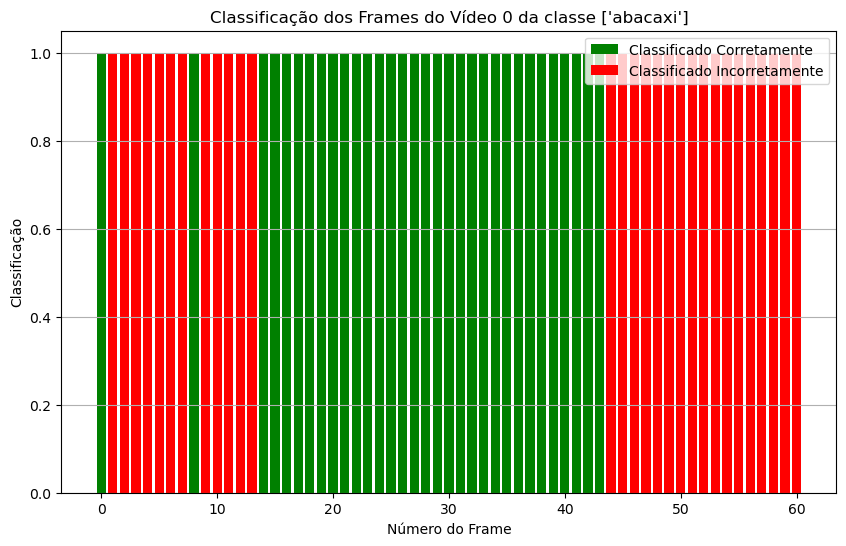

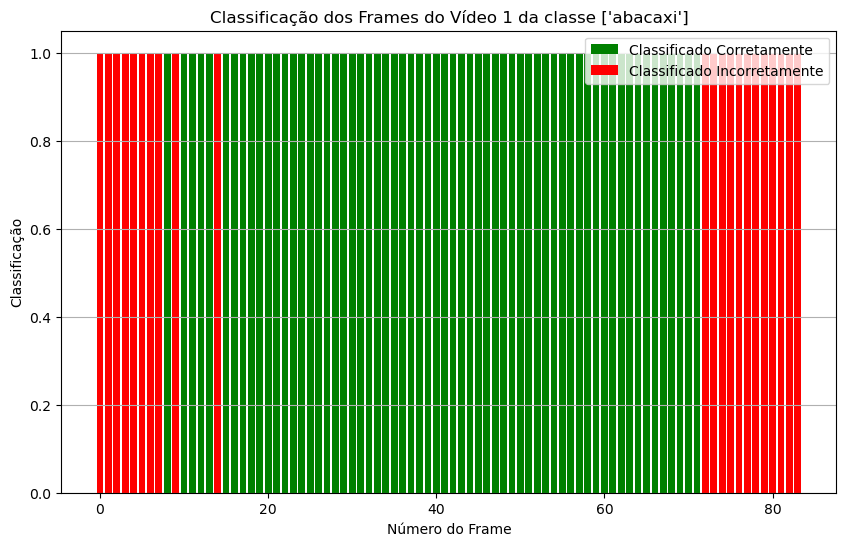

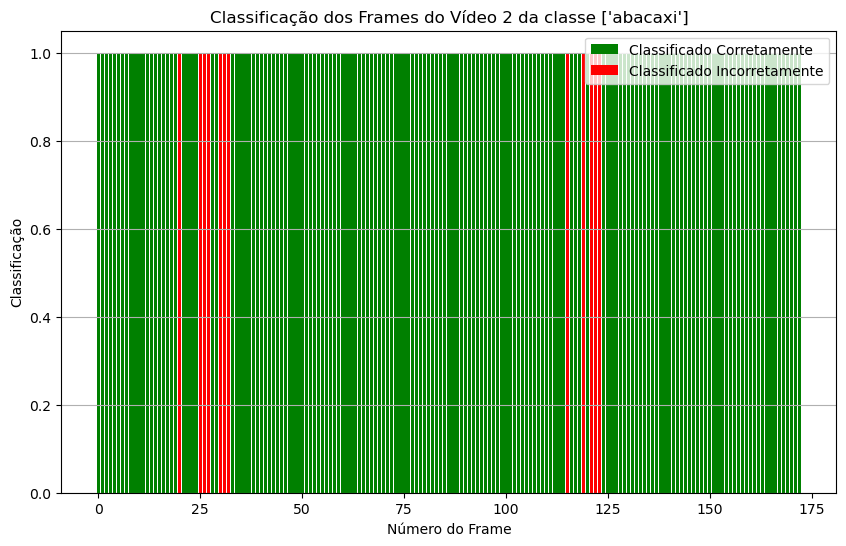

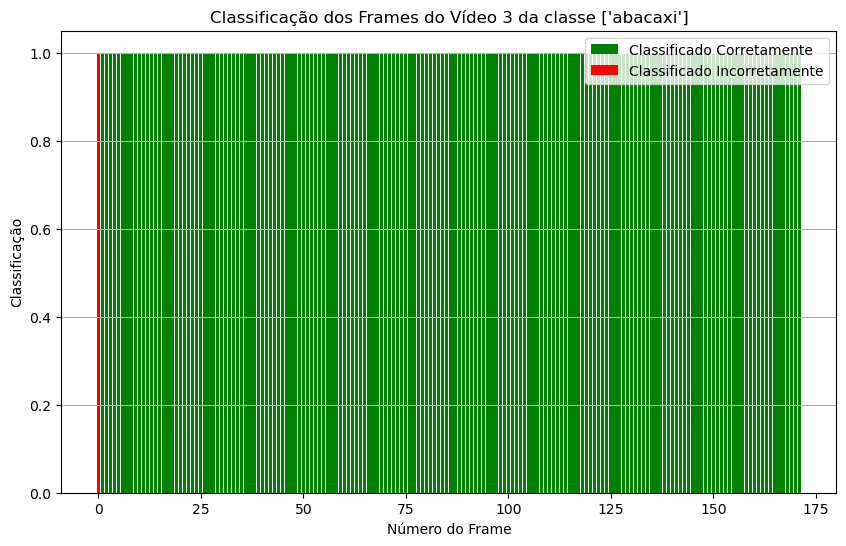

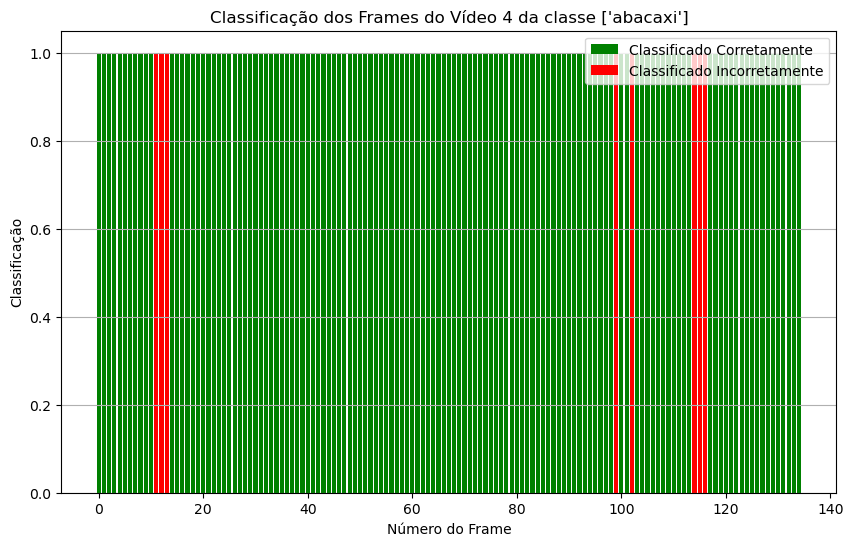

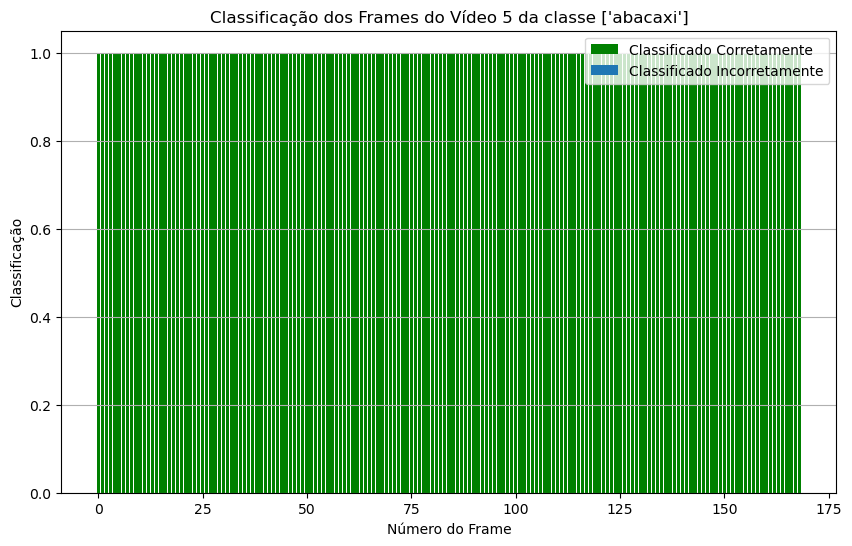

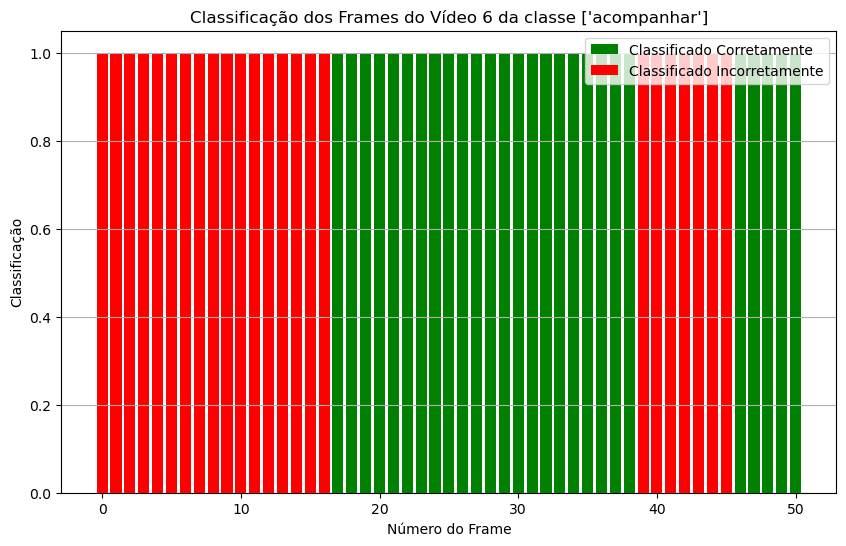

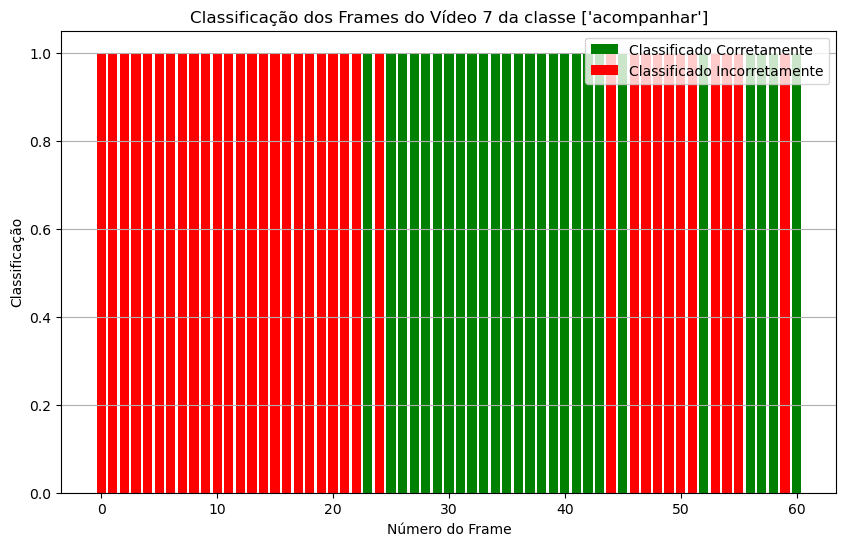

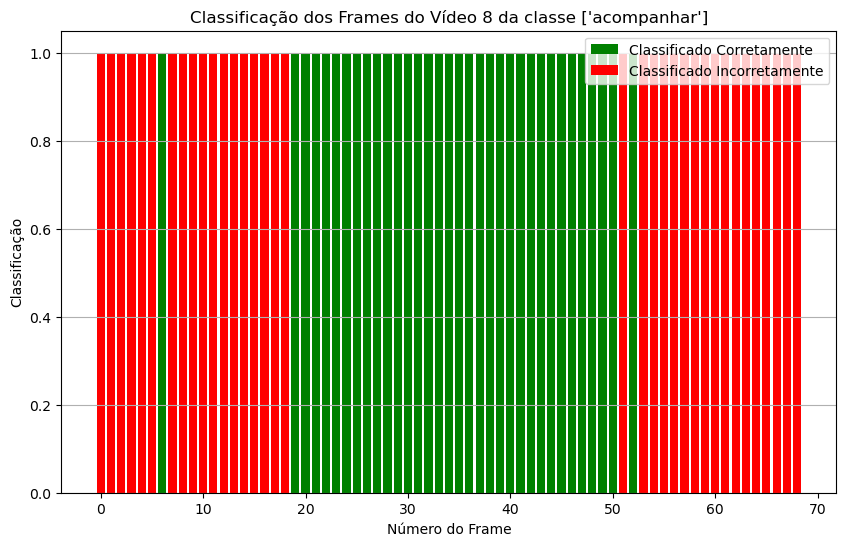

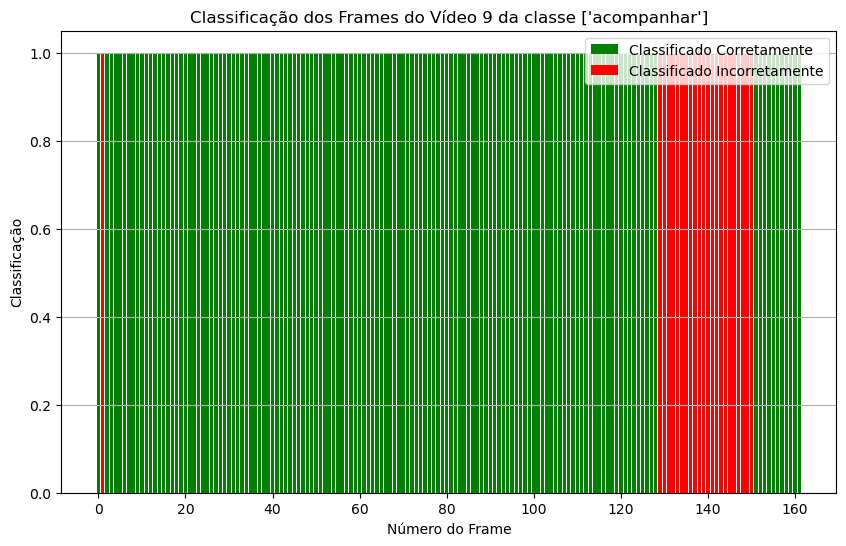

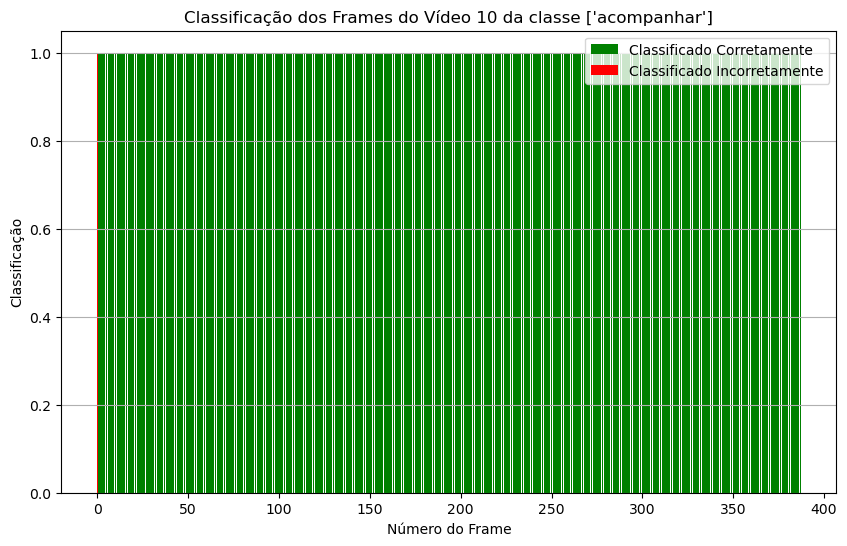

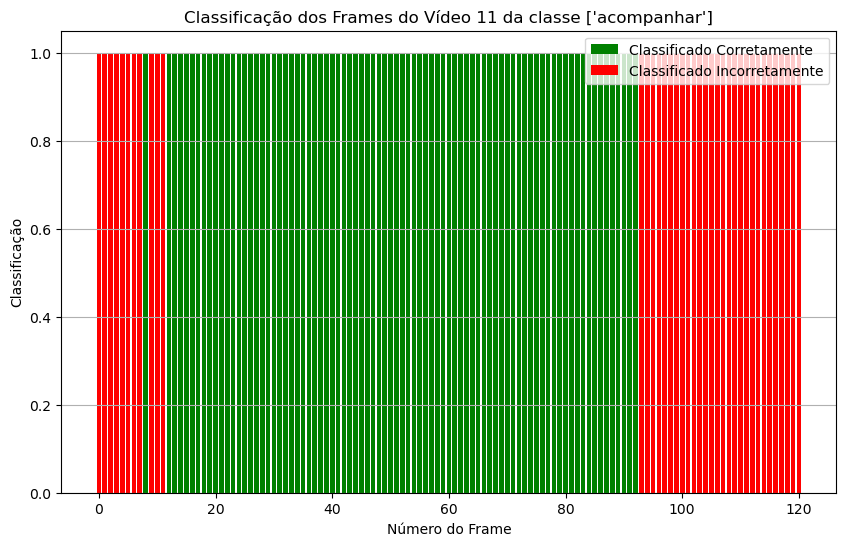

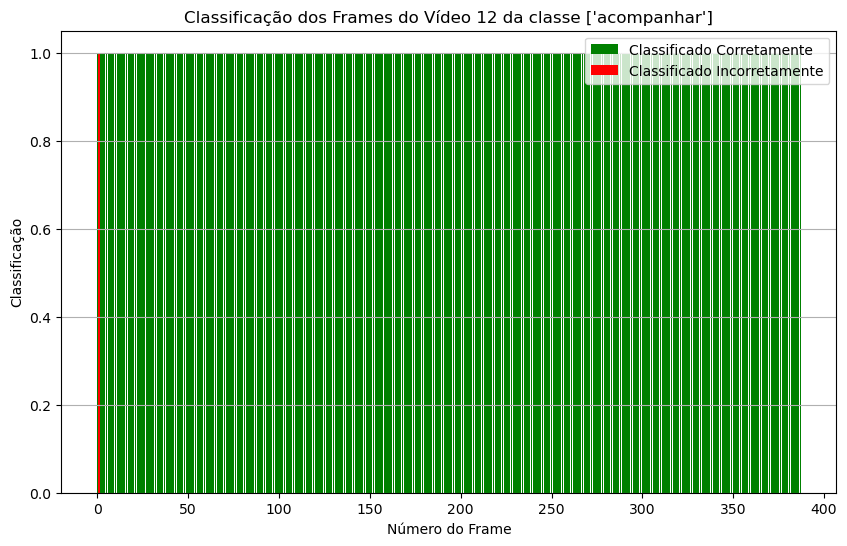

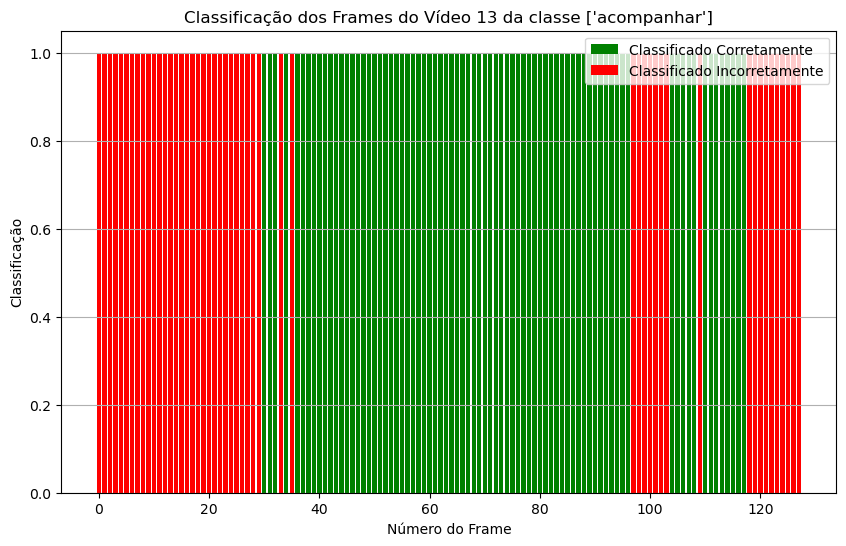

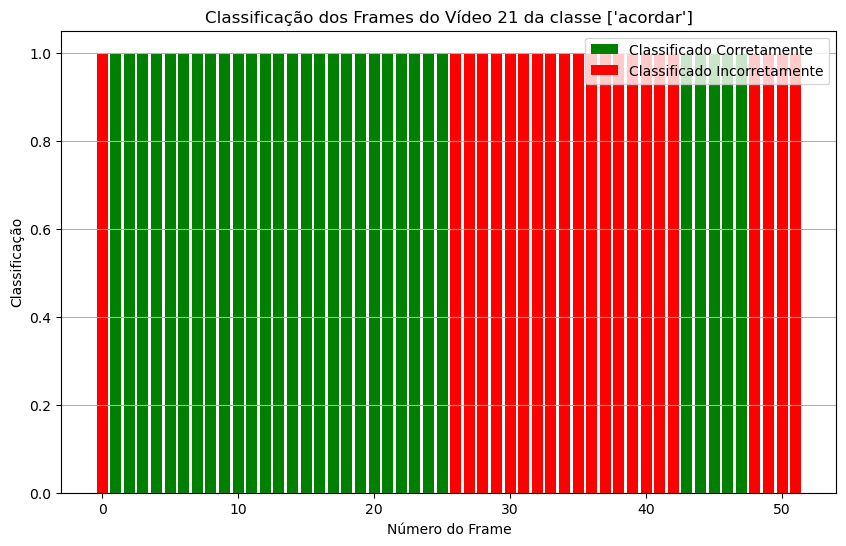

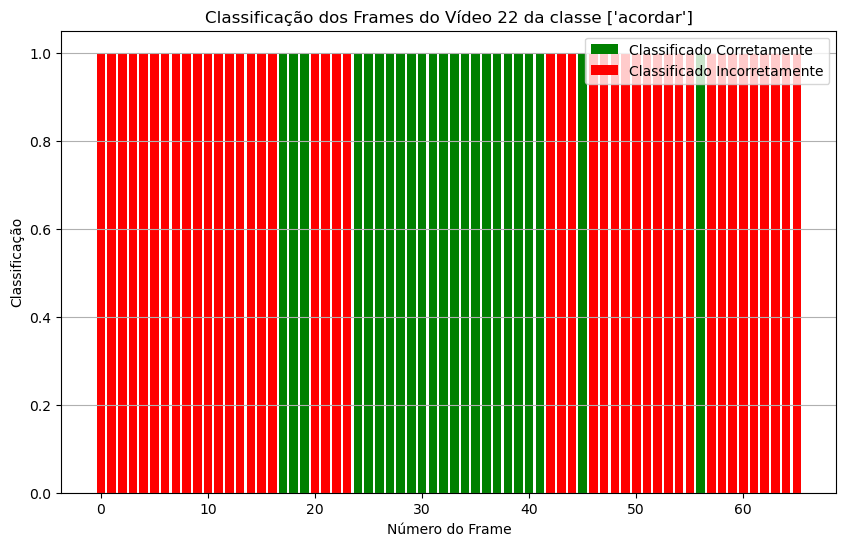

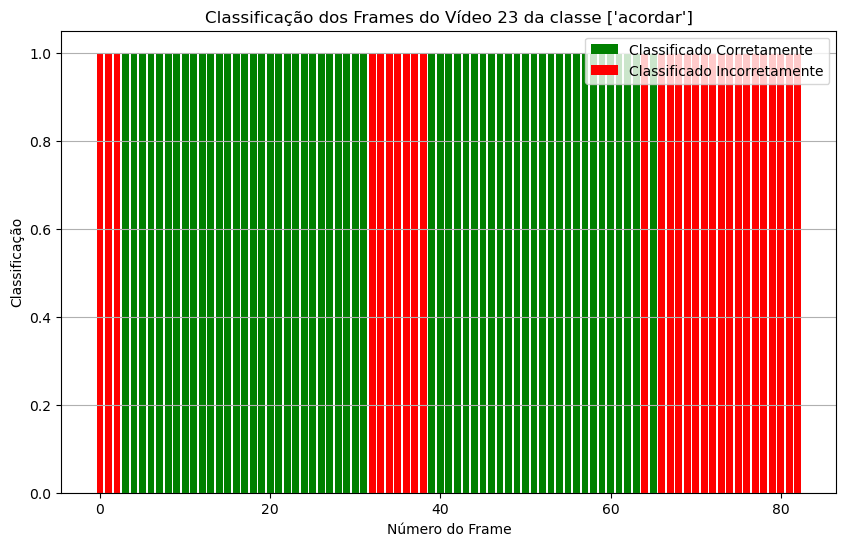

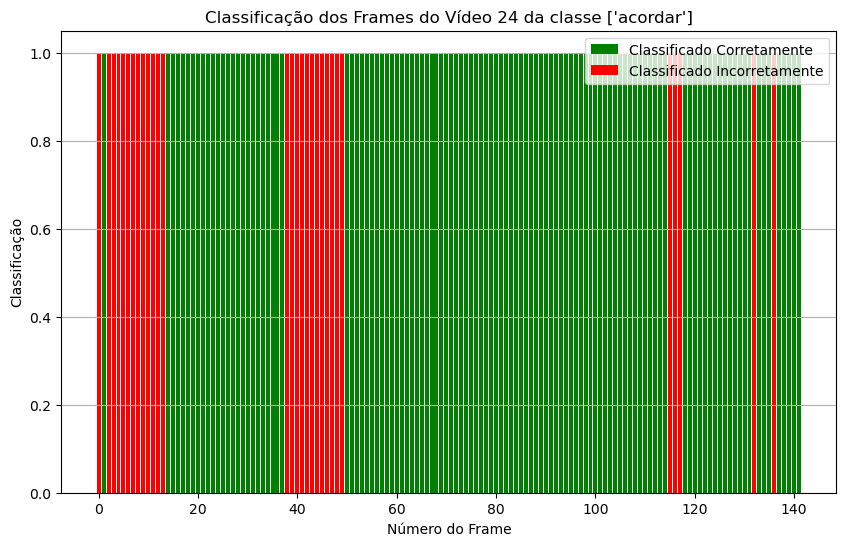

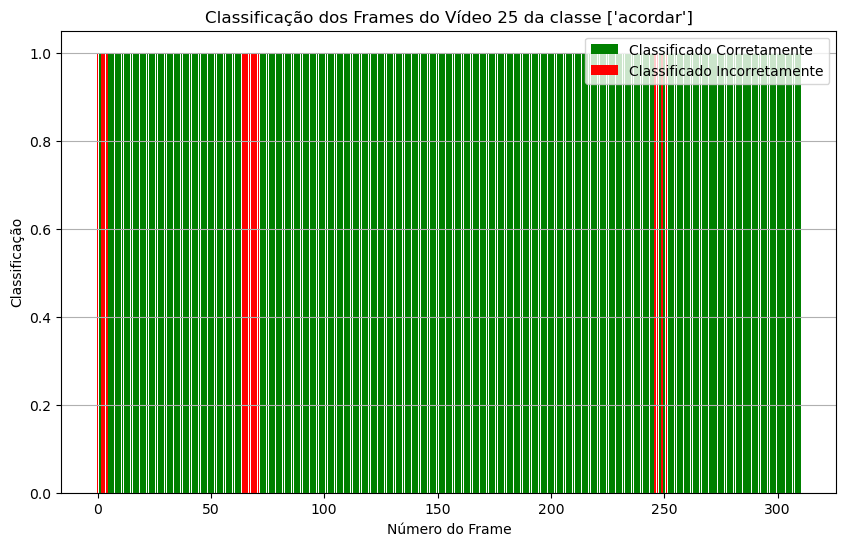

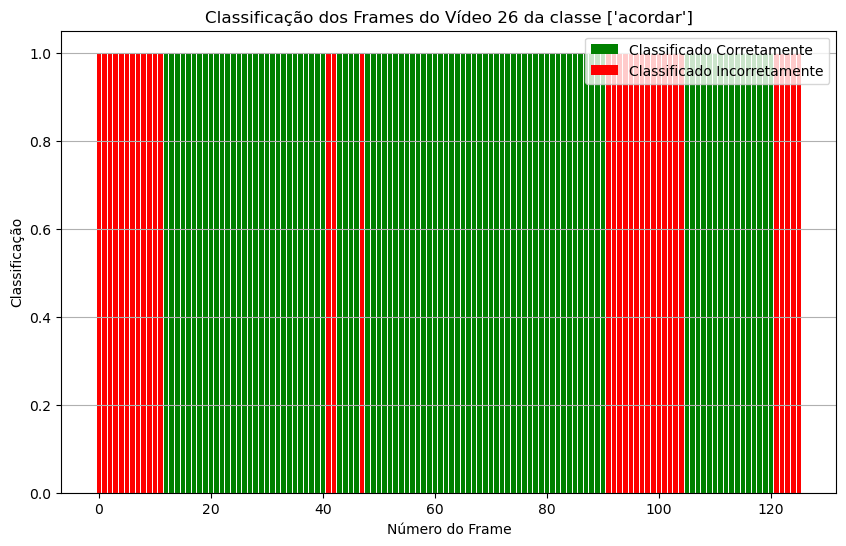

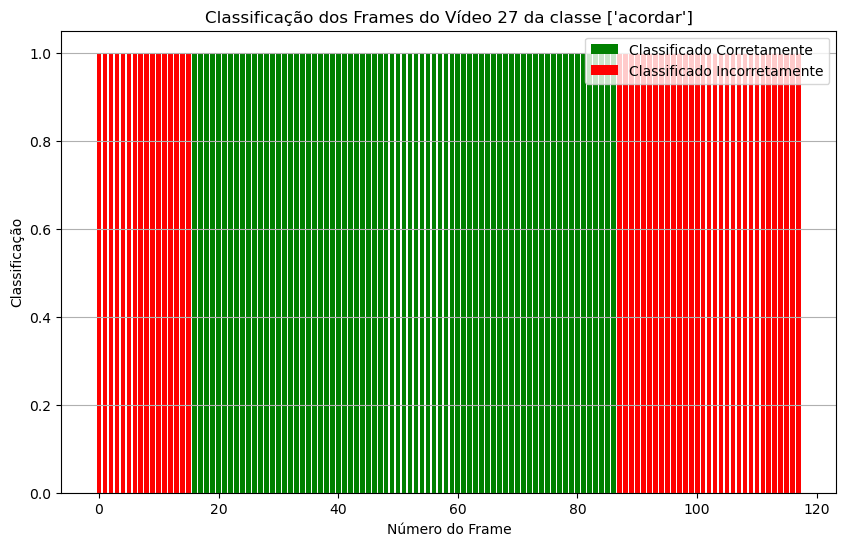

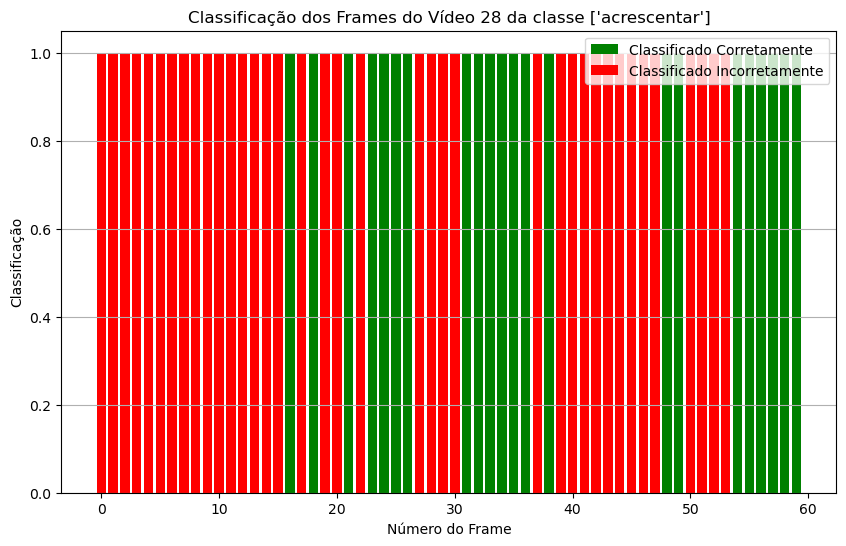

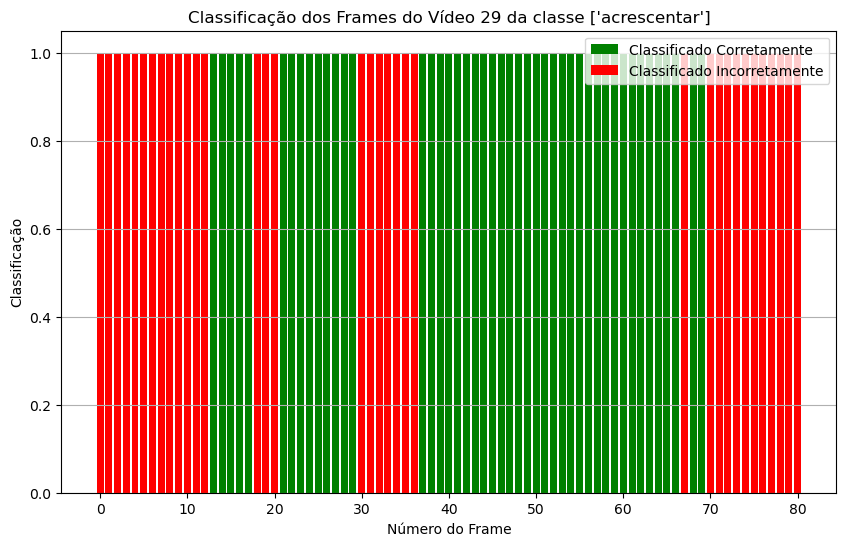

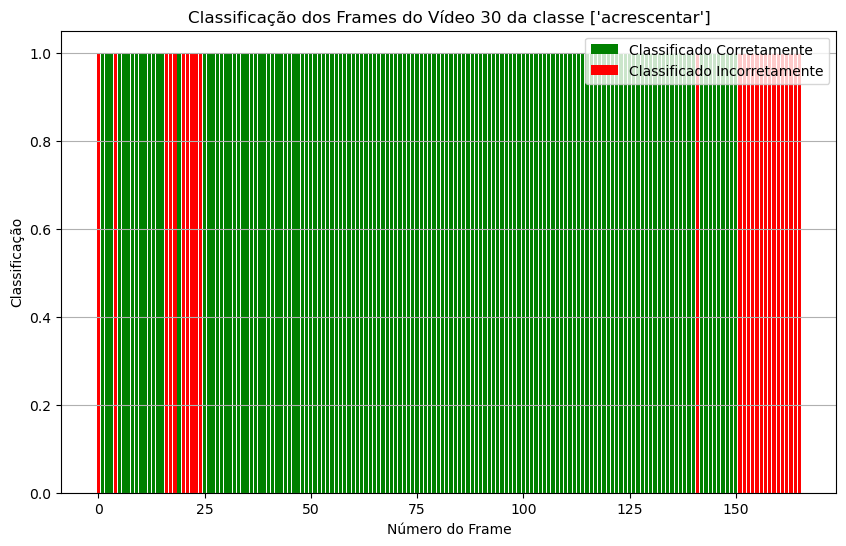

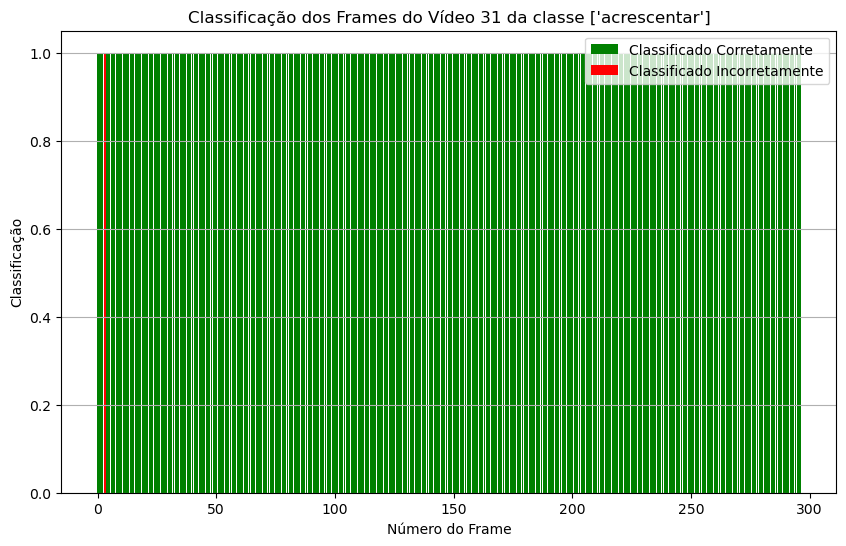

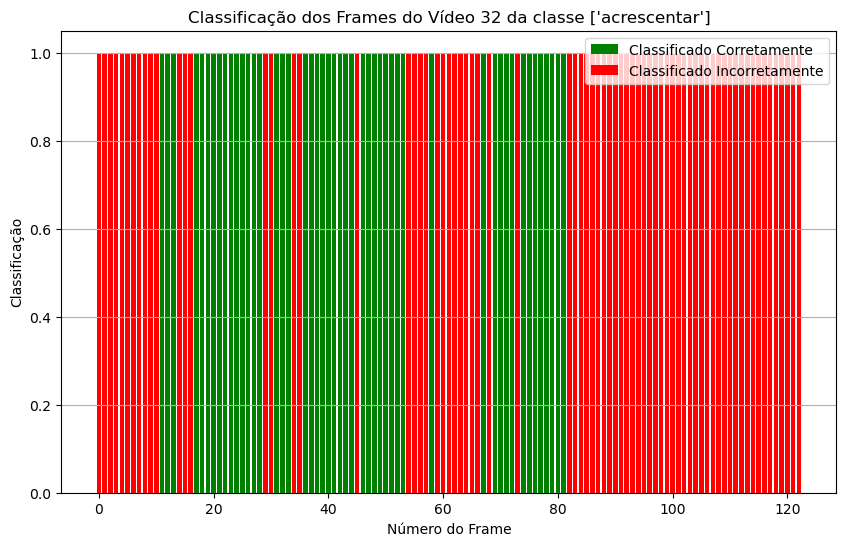

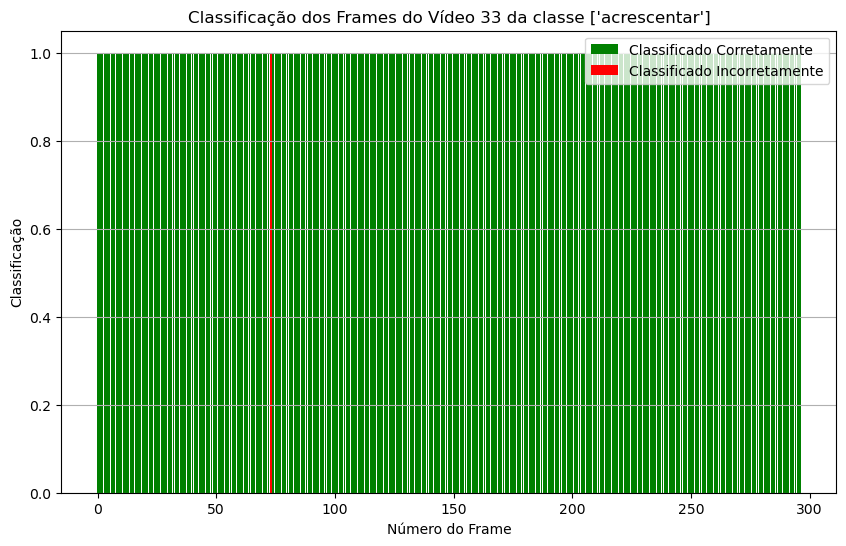

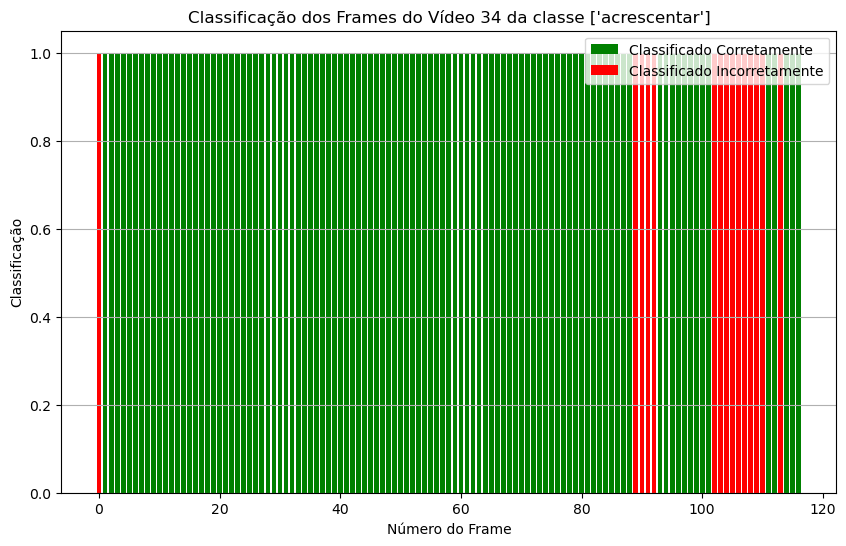

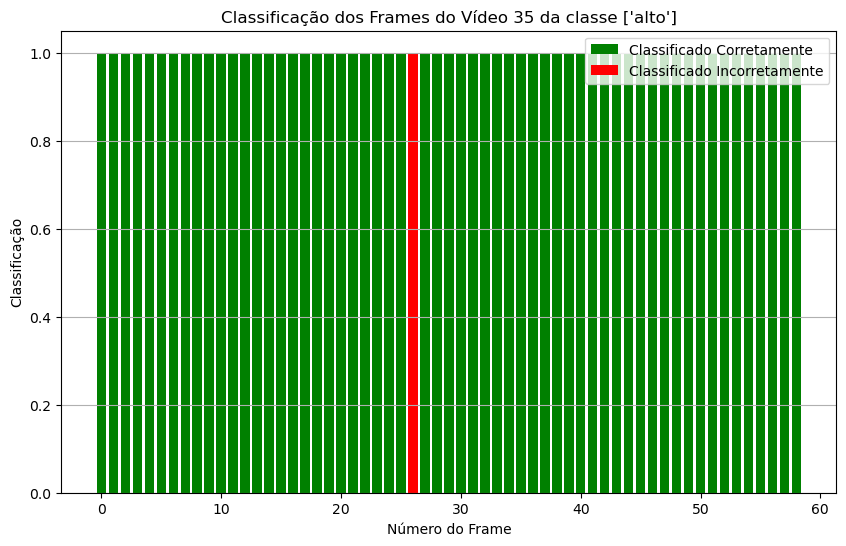

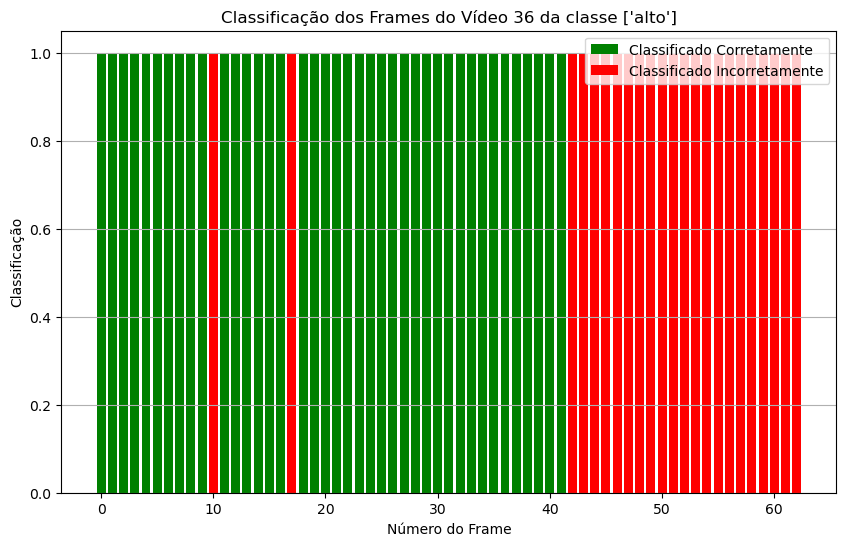

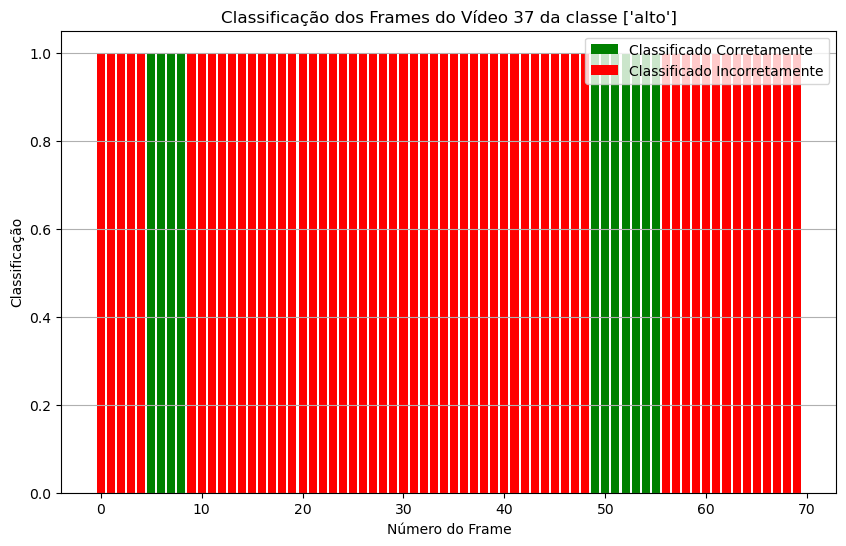

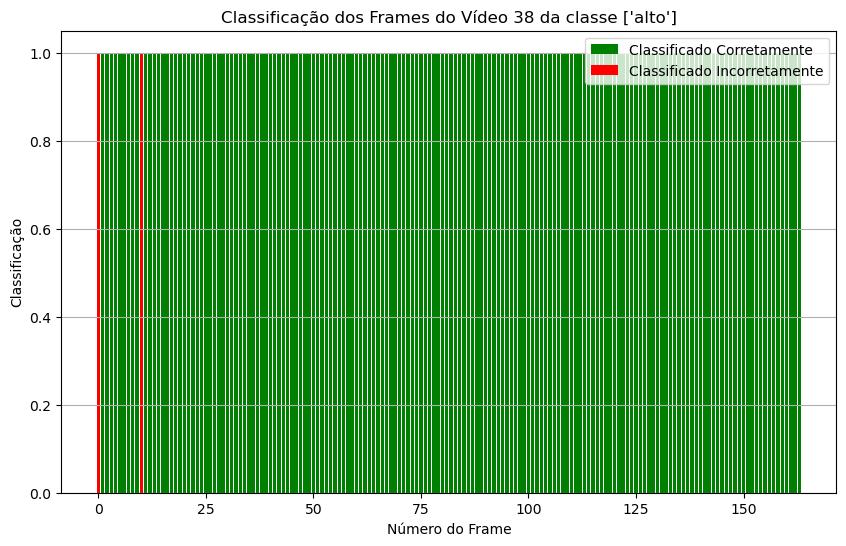

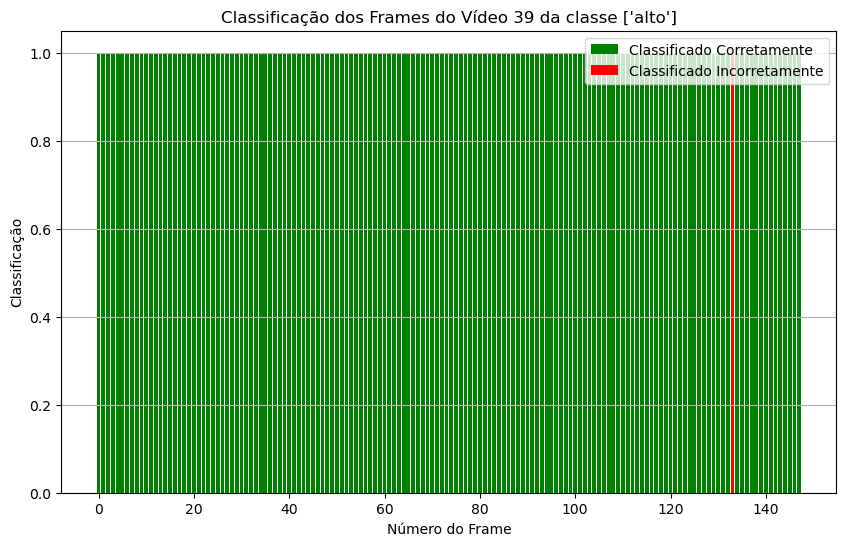

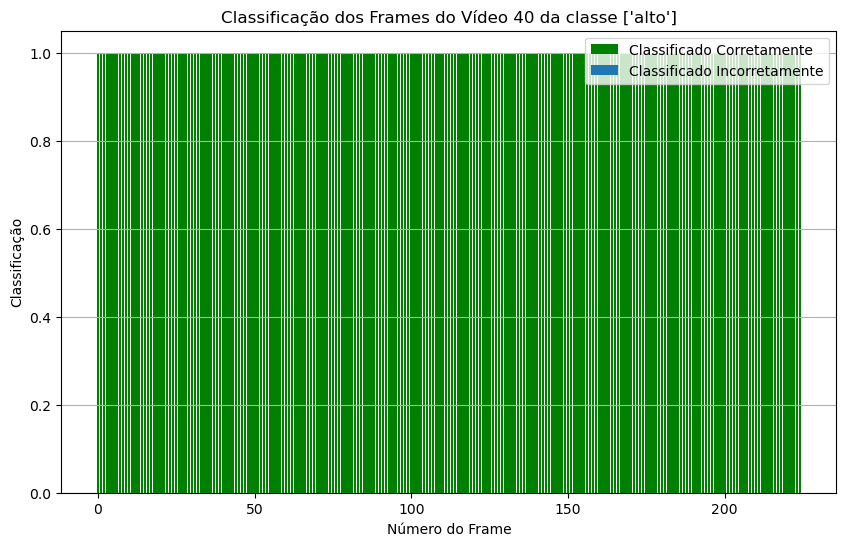

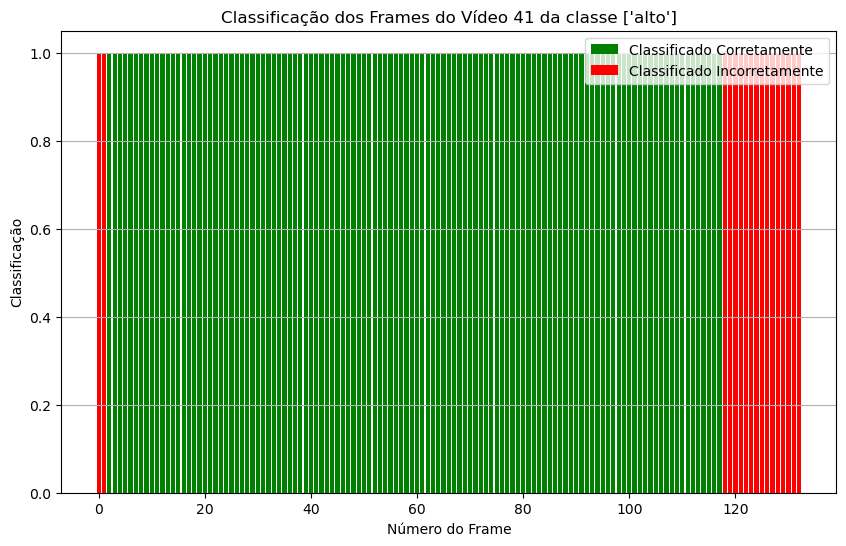

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Pegar ids dos videos
videos_ids = df_resultados['video_id'].unique()

# Loop sobre os IDs dos vídeos
for video_id in videos_ids:
    # Filtra frames do vídeo atual
    frames_video = df_resultados[df_resultados['video_id'] == video_id]

    # Filtra os frames classificados corretamente e incorretamente
    frames_corretos = frames_video[frames_video['class_num'] == frames_video['pred']]
    frames_incorretos = frames_video[frames_video['class_num'] != frames_video['pred']]

    # Cria o gráfico de barras para o vídeo atual
    plt.figure(figsize=(10, 6))
    plt.bar(frames_corretos['frame_id'], height=1, color='green', label='Classificado Corretamente')
    plt.bar(frames_incorretos['frame_id'], height=1, color='red', label='Classificado Incorretamente')
    plt.xlabel('Número do Frame')
    plt.ylabel('Classificação')
    plt.title(f'Classificação dos Frames do Vídeo {video_id} da classe {le.inverse_transform([frames_video["class_num"].iloc[0]])}')
    plt.legend()
    plt.grid(axis='y')
    plt.show()

In [15]:
# treinar e salvar o modelo com todos os dados

model.fit(X, y)
model.save_model('xgboost_5_classes.model')

In [6]:
# Experimento 2: excluindo coordenadas z

X = X[[col for col in X.columns if '_z_' not in col]]
X.head()

,pose_x_0,pose_y_0,pose_x_1,pose_y_1,pose_x_2,pose_y_2,pose_x_3,pose_y_3,pose_x_4,pose_y_4,pose_x_5,pose_y_5,pose_x_6,pose_y_6,pose_x_7,pose_y_7,pose_x_8,pose_y_8,pose_x_9,pose_y_9,pose_x_10,pose_y_10,pose_x_11,pose_y_11,pose_x_12,pose_y_12,pose_x_13,pose_y_13,pose_x_14,pose_y_14,pose_x_15,pose_y_15,pose_x_16,pose_y_16,pose_x_17,pose_y_17,pose_x_18,pose_y_18,pose_x_19,pose_y_19,pose_x_20,pose_y_20,pose_x_21,pose_y_21,pose_x_22,pose_y_22,pose_x_23,pose_y_23,pose_x_24,pose_y_24,pose_x_25,pose_y_25,pose_x_26,pose_y_26,pose_x_27,pose_y_27,pose_x_28,pose_y_28,pose_x_29,pose_y_29,pose_x_30,pose_y_30,pose_x_31,pose_y_31,pose_x_32,pose_y_32,left_hand_x_0,left_hand_y_0,left_hand_x_1,left_hand_y_1,left_hand_x_2,left_hand_y_2,left_hand_x_3,left_hand_y_3,left_hand_x_4,left_hand_y_4,left_hand_x_5,left_hand_y_5,left_hand_x_6,left_hand_y_6,left_hand_x_7,left_hand_y_7,left_hand_x_8,left_hand_y_8,left_hand_x_9,left_hand_y_9,left_hand_x_10,left_hand_y_10,left_hand_x_11,left_hand_y_11,left_hand_x_12,left_hand_y_12,left_hand_x_13,left_hand_y_13,left_hand_x_14,left_hand_y_14,left_hand_x_15,left_hand_y_15,left_hand_x_16,left_hand_y_16,left_hand_x_17,left_hand_y_17,left_hand_x_18,left_hand_y_18,left_hand_x_19,left_hand_y_19,left_hand_x_20,left_hand_y_20,right_hand_x_0,right_hand_y_0,right_hand_x_1,right_hand_y_1,right_hand_x_2,right_hand_y_2,right_hand_x_3,right_hand_y_3,right_hand_x_4,right_hand_y_4,right_hand_x_5,right_hand_y_5,right_hand_x_6,right_hand_y_6,right_hand_x_7,right_hand_y_7,right_hand_x_8,right_hand_y_8,right_hand_x_9,right_hand_y_9,right_hand_x_10,right_hand_y_10,right_hand_x_11,right_hand_y_11,right_hand_x_12,right_hand_y_12,right_hand_x_13,right_hand_y_13,right_hand_x_14,right_hand_y_14,right_hand_x_15,right_hand_y_15,right_hand_x_16,right_hand_y_16,right_hand_x_17,right_hand_y_17,right_hand_x_18,right_hand_y_18,right_hand_x_19,right_hand_y_19,right_hand_x_20,right_hand_y_20
0,0.495696,0.251119,0.521189,0.209761,0.533843,0.210290,0.545261,0.212878,0.475877,0.212704,0.463136,0.214114,0.449410,0.217801,0.568593,0.239211,0.438194,0.247255,0.526797,0.307200,0.471233,0.309380,0.678584,0.549230,0.340820,0.535919,0.732885,0.914818,0.284963,0.897970,0.760130,1.175227,0.243029,1.153512,0.773915,1.271270,0.231868,1.245445,0.777519,1.251563,0.247854,1.218896,0.754638,1.220732,0.262080,1.188589,0.611316,1.167632,0.393333,1.161095,0.587860,1.639734,0.374465,1.629446,0.578596,2.055129,0.369760,2.055653,0.584013,2.119297,0.367156,2.122602,0.547246,2.189754,0.393758,2.191146,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,0.495288,0.252841,0.520663,0.213098,0.533857,0.213758,0.545182,0.215439,0.475431,0.215584,0.462078,0.217285,0.449261,0.219710,0.568426,0.241346,0.438184,0.247786,0.526384,0.308975,0.469505,0.311069,0.678677,0.549743,0.340721,0.535921,0.732540,0.917953,0.284964,0.898140,0.760292,1.188829,0.243005,1.153649,0.774294,1.286058,0.230946,1.245461,0.779254,1.281569,0.247221,1.220808,0.756087,1.248713,0.261555,1.190389,0.616288,1.177417,0.394434,1.173716,0.592848,1.665828,0.376594,1.664803,0.579834,2.097918,0.369632,2.108122,0.584832,2.163301,0.367089,2.178849,0.547268,2.239179,0.390403,2.243814,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,0.495044,0.253372,0.520381,0.214643,0.533899,0.215396,0.545160,0.216666,0.475202,0.216619,0.461485,0.218336,0.449155,0.220254,0.568391,0.242590,0.438184,0.247866,0.526088,0.309600,0.468491,0.311584,0.678793,0.550119,0.340644,0.5359

In [7]:
scores_ex_2 = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores_ex_2.mean())
print(scores_ex_2)

0.5763624267916297
[0.34649556 0.53603159 0.72359329 0.69565217 0.58003953]


Tirar o z piora a acuracia em algumas classes, porém melhora em outras